## Clustering con K-Means

Número óptimo de clusters: 5


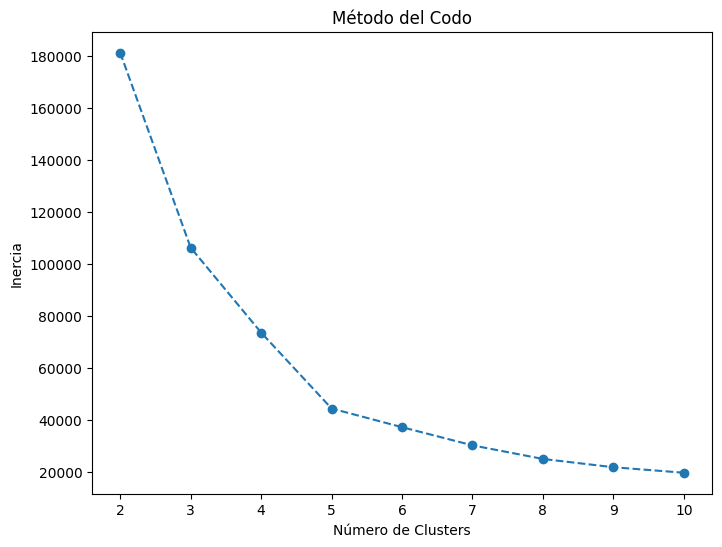

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos "Mall Customer Segmentation"
df = pd.read_csv('https://raw.githubusercontent.com/Learnlearningplatform/Mall_Customer_Segmentation/master/Mall_Customers.csv')

# Seleccionar las columnas relevantes para clustering (Ingresos Anuales y Puntuación de Gasto)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Encontrar el número óptimo de clusters utilizando el método de la silueta
silhouette_scores = []
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=50, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia.append(kmeans.inertia_)

# Determinar el número óptimo de clusters
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 debido al rango de clusters
# optimal_num_clusters = 8
print(f"Número óptimo de clusters: {optimal_num_clusters}")

# Visualizar el método del codo para determinar el número óptimo de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Realizar el clustering K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

In [17]:
# Obtener los centroides de cada cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids['color'] = range(0, optimal_num_clusters)
centroids

,Annual Income (k$),Spending Score (1-100),color
0,55.296296,49.518519,0
1,88.200000,17.114286,1
2,26.304348,20.913043,2
3,25.727273,79.363636,3
4,86.538462,82.128205,4


In [18]:
# Visualización interactiva con Plotly Express
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster',
                 title=f'K-means ({optimal_num_clusters} clusters) - Segmentación de clientes',
                 labels={'Annual Income (k$)': 'Ingreso anual (k$)', 'Spending Score (1-100)': 'Scoring de gastos'},
                 hover_name='cluster')

symbols = ['x', 'square', 'circle-dot', 'circle', 'circle-open']

# Agregar los centroides como puntos adicionales
fig.add_trace(px.scatter(centroids, x='Annual Income (k$)', y='Spending Score (1-100)', color='color', symbol_sequence = symbols).data[0])

fig.update_traces(marker=dict(size=8, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))
fig.show()